<a href="https://colab.research.google.com/github/marianogoes/PCD/blob/main/Algoritmo_Gen%C3%A9tico_Tesina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmo genético

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [ ]:
import numpy as np
np.bool = np.bool_

In [ ]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score


Ajustes a la base de datos

In [ ]:
data=pd.read_excel('/content/Database.xlsx')

In [ ]:
enc_estado = (data.groupby('Estado').size()) / len(data)
data['Estadp_fe'] = data['Estado'].apply(lambda x : enc_estado[x])

In [ ]:
base_D = pd.get_dummies(data, columns = ['Personas', 'Sexo','UltimoNivelEducativo','Salud','GradoPadre','GradoMadre','Piel'])

In [ ]:
pd.options.display.max_columns = None

In [ ]:
data_bc = base_D
label_bc = data_bc["RangoAlto"]
data_bc.drop(["Estado","RangoAlto","Ingresos"],axis = 1,inplace = True)

print("Nivel de ingresos dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

Nivel de ingresos dataset:
 17640 Records
 65 Features


In [ ]:
data_bc

,CompartenGasto,ParentezcoJefe,estatura,Peso,Estadp_fe,Personas_1,Personas_2,Personas_3,Personas_4,Personas_5,Personas_6,Personas_7,Personas_8,Personas_9,Personas_10,Personas_11,Personas_12,Personas_13,Personas_14,Personas_15,Sexo_1,Sexo_2,UltimoNivelEducativo_0,UltimoNivelEducativo_1,UltimoNivelEducativo_2,UltimoNivelEducativo_3,UltimoNivelEducativo_4,UltimoNivelEducativo_5,UltimoNivelEducativo_6,UltimoNivelEducativo_7,UltimoNivelEducativo_8,UltimoNivelEducativo_9,UltimoNivelEducativo_10,UltimoNivelEducativo_11,UltimoNivelEducativo_12,Salud_1,Salud_2,Salud_3,Salud_4,Salud_5,GradoPadre_0,GradoPadre_1,GradoPadre_2,GradoPadre_3,GradoPadre_4,GradoPadre_5,GradoPadre_6,GradoMadre_0,GradoMadre_1,GradoMadre_2,GradoMadre_3,GradoMadre_4,GradoMadre_5,GradoMadre_6,Piel_1,Piel_2,Piel_3,Piel_4,Piel_5,Piel_6,Piel_7,Piel_8,Piel_9,Piel_10,Piel_11
0,1,1,48,47,0.033787,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,1,1,66,90,0.033787,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,1,1,66,58,0.033787,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,1,1,50,85,0.033787,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,1,1,56,74,0.033787,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17635,1,2,52,97,0.026701,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
17636,1,2,56,65,0.026701,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
17637,1,2,47,48,0.026701,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,F

In [ ]:
display(data_bc.head())
print("The features in this dataset have both discrete and continuous values")

,CompartenGasto,ParentezcoJefe,estatura,Peso,Estadp_fe,Personas_1,Personas_2,Personas_3,Personas_4,Personas_5,Personas_6,Personas_7,Personas_8,Personas_9,Personas_10,Personas_11,Personas_12,Personas_13,Personas_14,Personas_15,Sexo_1,Sexo_2,UltimoNivelEducativo_0,UltimoNivelEducativo_1,UltimoNivelEducativo_2,UltimoNivelEducativo_3,UltimoNivelEducativo_4,UltimoNivelEducativo_5,UltimoNivelEducativo_6,UltimoNivelEducativo_7,UltimoNivelEducativo_8,UltimoNivelEducativo_9,UltimoNivelEducativo_10,UltimoNivelEducativo_11,UltimoNivelEducativo_12,Salud_1,Salud_2,Salud_3,Salud_4,Salud_5,GradoPadre_0,GradoPadre_1,GradoPadre_2,GradoPadre_3,GradoPadre_4,GradoPadre_5,GradoPadre_6,GradoMadre_0,GradoMadre_1,GradoMadre_2,GradoMadre_3,GradoMadre_4,GradoMadre_5,GradoMadre_6,Piel_1,Piel_2,Piel_3,Piel_4,Piel_5,Piel_6,Piel_7,Piel_8,Piel_9,Piel_10,Piel_11
0,1,1,48,47,0.033787,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,1,1,66,90,0.033787,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,1,1,66,58,0.033787,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,1,1,50,85,0.033787,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,1,1,56,74,0.033787,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False


The features in this dataset have both discrete and continuous values


In [ ]:
score1 = acc_score(data_bc,label_bc)
score1

,Classifier,Accuracy
0,AdaBoost,0.842630
1,GradientBoosting,0.842404
2,RandomForest,0.840816
3,RadialSVM,0.839229
4,LinearSVM,0.838549
5,Logistic,0.837188
6,KNeighbors,0.819501
7,DecisionTree,0.753061


In [ ]:
logmodel = AdaBoostClassifier(n_estimators=50, random_state=0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.25,n_gen=5,X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.8444444444444444]
Best score in generation 2 : [0.8442176870748299]
Best score in generation 3 : [0.8437641723356009]
Best score in generation 4 : [0.846031746031746]
Best score in generation 5 : [0.8437641723356009]


In [ ]:
chromo_df_bc[9]

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
        True,  True])

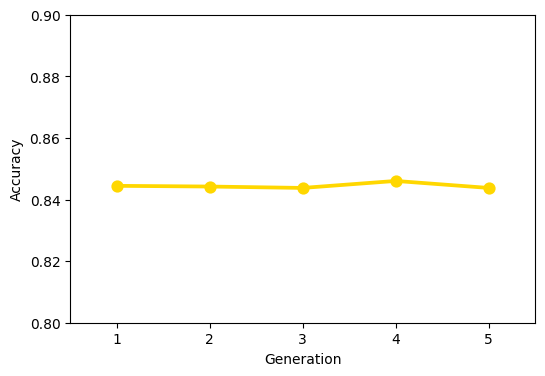

In [ ]:
plot(score_bc,0.8,0.9,c = "gold")

In [ ]:
n_feat=data_bc.shape[1]

In [ ]:
best_chromo=chromo_df_bc[4]

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        data_bc.iloc[:,best_chromo],
                                        label_bc,
                                        random_state = 123
                                    )

In [ ]:
# building a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Seting up the hyperparameter search
param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}


# Running a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fiting the model on the training data
ada_search.fit(X_train, y_train)

# Making predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

In [ ]:
ada_search.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=200)

In [ ]:
mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = ada_preds
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = ada_preds,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusión
-------------------
[[3615   64]
 [ 657   74]]

El accuracy de test es: 83.65079365079366 %


In [ ]:
print(
    classification_report(
        y_true = y_test,
        y_pred = ada_preds
    )
)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3679
           1       0.54      0.10      0.17       731

    accuracy                           0.84      4410
   macro avg       0.69      0.54      0.54      4410
weighted avg       0.79      0.84      0.79      4410



In [ ]:
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
importancia = permutation_importance(
                estimator    = ada_search.best_estimator_,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'accuracy',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
2,6.288738e-03,0.000909,Estadp_fe
17,4.323507e-03,0.001052,UltimoNivelEducativo_4
1,3.824641e-03,0.001037,estatura
15,3.597884e-03,0.000077,UltimoNivelEducativo_2
39,2.479214e-03,0.000437,Piel_7
4,2.252457e-03,0.000356,Personas_2
5,2.040816e-03,0.000599,Personas_3
3,1.980348e-03,0.000404,Personas_1
25,1.753590e-03,0.000718,Salud_4
24,1.708239e-03,0.000544,Salud_3


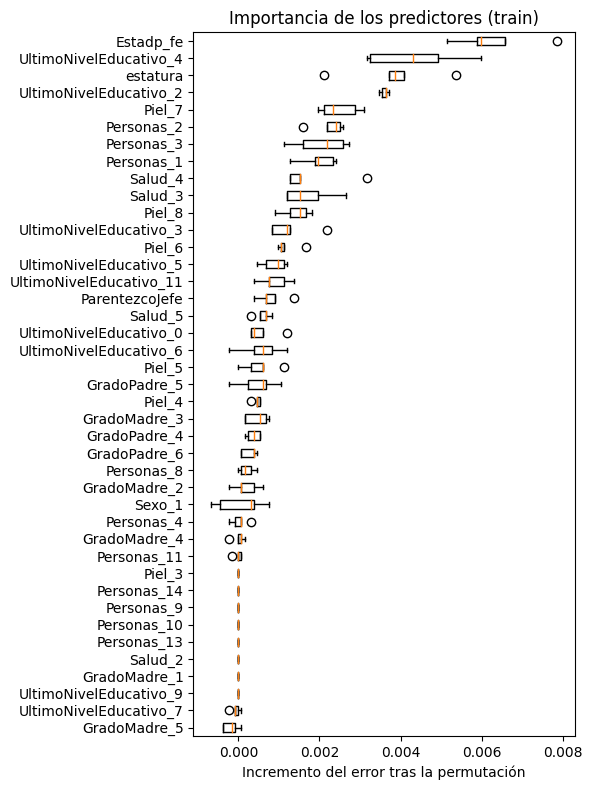

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(6, 8))
sorted_idx = importancia.importances_mean.argsort()
ax.boxplot(
        importancia.importances[sorted_idx].T,
        vert   = False,
        labels = data_bc.iloc[:,best_chromo].columns[sorted_idx]
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación')
fig.tight_layout();

Matriz de confusión
-------------------
[[3615   64]
 [ 657   74]]

El accuracy de test es: 83.65079365079366 %


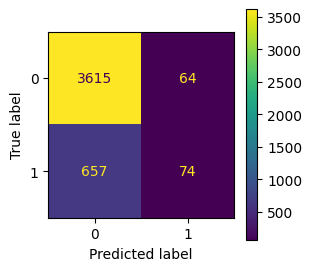

In [ ]:
mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = ada_preds
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = ada_preds,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay(mat_confusion).plot(ax=ax);